In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold

In [5]:
data = pd.read_csv("data_waveforms_incomplete.csv")
data = data.rename(columns={"icu_length": "inpatient"})
data

,caseid,subjectid,Age,Ht,Wt,Sex,OP_time,Open,Robotic,Videoscopic,icu_days,death_inhosp,age_group,inpatient,Mahalanobis,rmssds,jumps,perc_outs
0,55,5077,18.0,175.1,59.2,0,292.55,1,0,0,3,0,child,1,2.082258,0.012279,3,7.787555
1,264,10,0.7,64.1,8.9,1,475.00,1,0,0,38,0,child,1,2.051887,0.011702,2,4.093900
2,280,5985,0.6,42.0,5.6,1,435.00,1,0,0,15,0,child,1,2.553821,0.016955,0,2.513406
3,366,10,0.8,64.1,8.9,1,115.00,1,0,0,38,0,child,1,1.676772,0.010308,0,0.417537
4,527,4603,18.0,185.0,62.6,0,210.00,1,0,0,1,0,child,0,1.775898,0.037247,7,6.031319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,6361,2220,68.0,163.6,55.7,0,205.00,0,0,1,1,0,elder,0,1.421129,0.000000,0,0.000000
1132,6362,2012,81.0,163.4,50.3,0,170.00,0,0,1,1,0,elder,0,1.865848,0.000000,0,0.000000
1133,6366,3096,70.0,152.8,63.5,1,125.20,0,0,1,1,0,elder,0,1.938629,0.000000,0,0.000000
1134,6368,1908,72.0,153.1,49.8,0,246.00,1,0,0,1,0,elder,0,2.487556,0.000000,0,0.000000


# Random Forest (ICU) with waveforms

There are 908 training instances and 228 testing instances
Accuracy: 0.7631578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.67      0.46      0.55        71

    accuracy                           0.76       228
   macro avg       0.73      0.68      0.69       228
weighted avg       0.75      0.76      0.75       228



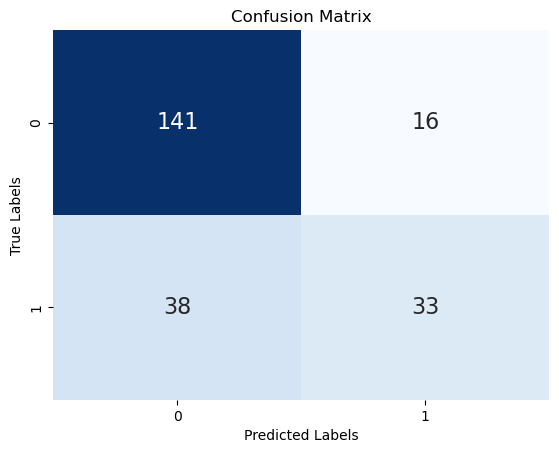

In [6]:
X_rf_icu = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic', 'rmssds', 'jumps', 'perc_outs']]
y_rf_icu = data['inpatient']

X_train_rf_icu, X_test_rf_icu, y_train_rf_icu, y_test_rf_icu = train_test_split(X_rf_icu, y_rf_icu, test_size=0.2, random_state=42)
print(f'There are {len(y_train_rf_icu)} training instances and {len(y_test_rf_icu)} testing instances')

clf_icu = RandomForestClassifier(n_estimators=100, random_state=42)
clf_icu.fit(X_train_rf_icu, y_train_rf_icu)

y_pred_rf_icu = clf_icu.predict(X_test_rf_icu)



accuracy_rf_icu = accuracy_score(y_test_rf_icu, y_pred_rf_icu)
print("Accuracy:", accuracy_rf_icu)

# Classification Report
print("Classification Report:\n", classification_report(y_test_rf_icu, y_pred_rf_icu))

cm_rf_icu = confusion_matrix(y_test_rf_icu, y_pred_rf_icu)

plt.figure()
sns.heatmap(cm_rf_icu, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()